In [18]:
import random
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["image.cmap"] = "gray"


In [19]:
from tensorflow.keras.datasets import fashion_mnist

In [20]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [21]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

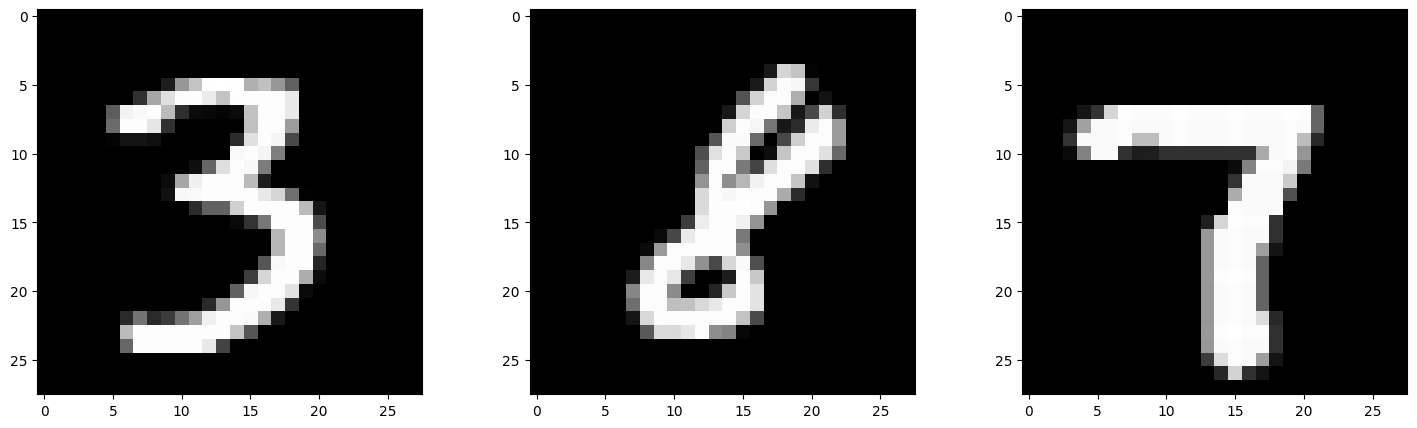

In [22]:
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [23]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype("float32") / 255



In [24]:
# Convert integer labels to one-hot encoded vectors.
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test  = to_categorical(y_test)

In [27]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(28 * 28,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()


/home/youssef-abuzeid/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
training_history = model.fit(X_train, y_train, epochs=251, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/251
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9983 - loss: 0.0044 - val_accuracy: 0.9717 - val_loss: 0.2110
Epoch 2/251
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9983 - loss: 0.0046 - val_accuracy: 0.9746 - val_loss: 0.2003
Epoch 3/251
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9729 - val_loss: 0.2112
Epoch 4/251
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0.9738 - val_loss: 0.2185
Epoch 5/251
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9738 - val_loss: 0.2062
Epoch 6/251
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9735 - val_loss: 0.2260
Epoch 7/251
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9754 - val_loss: 0.2157
Epoch 8/251
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accu

In [30]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Train")
    plt.plot(history.history["val_loss"], label="Validation")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Train")
    plt.plot(history.history["val_accuracy"], label="Validation")
    plt.title("Accuracy")
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.legend()

    plt.tight_layout()
    plt.show()

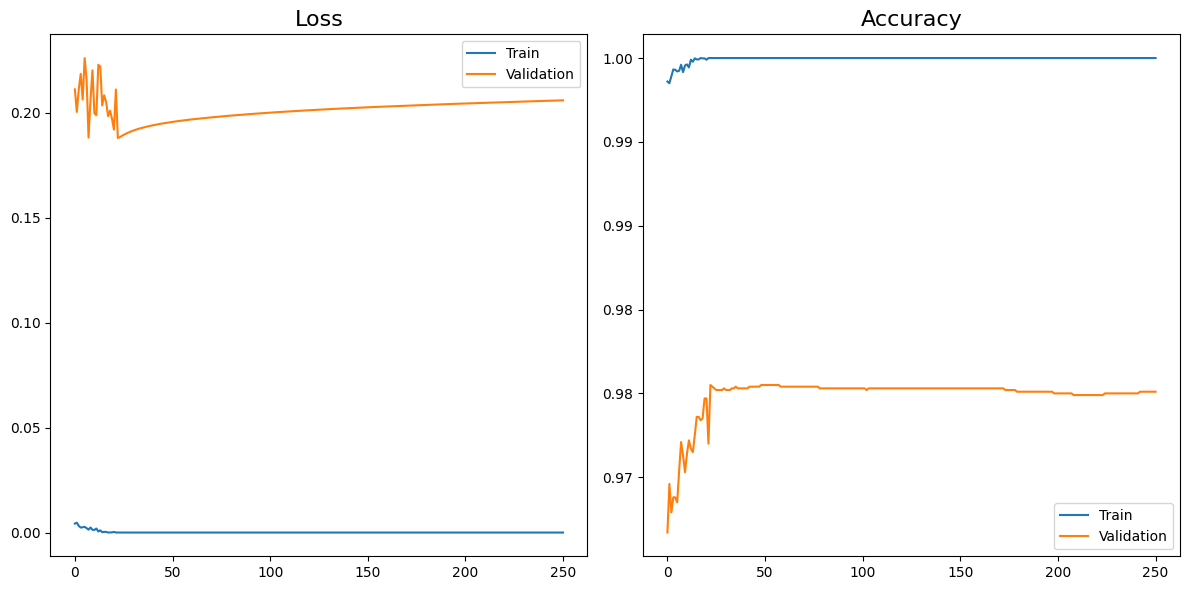

In [33]:
plot_training_history(training_history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step


Text(0.5, 1.0, 'Predicted class: 7, Actual class: 7')

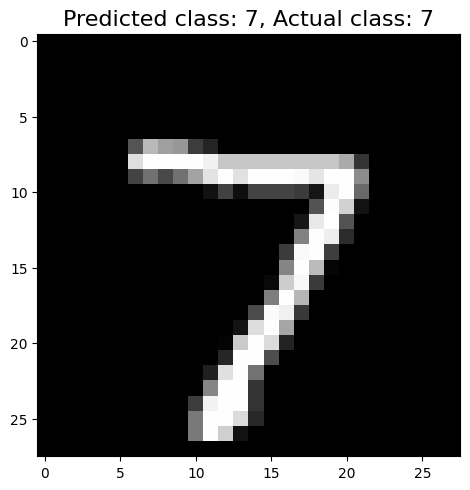

In [41]:
y_pred = model.predict(X_test)

index = 0
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
plt.title(f"Predicted class: {np.argmax (y_pred[index])}, Actual class: {np.argmax(y_test[index])}")


## Confusion Matrix



In [44]:
predictions = model.predict(X_test)
predicted_labels = [np.argmax(prediction) for prediction in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


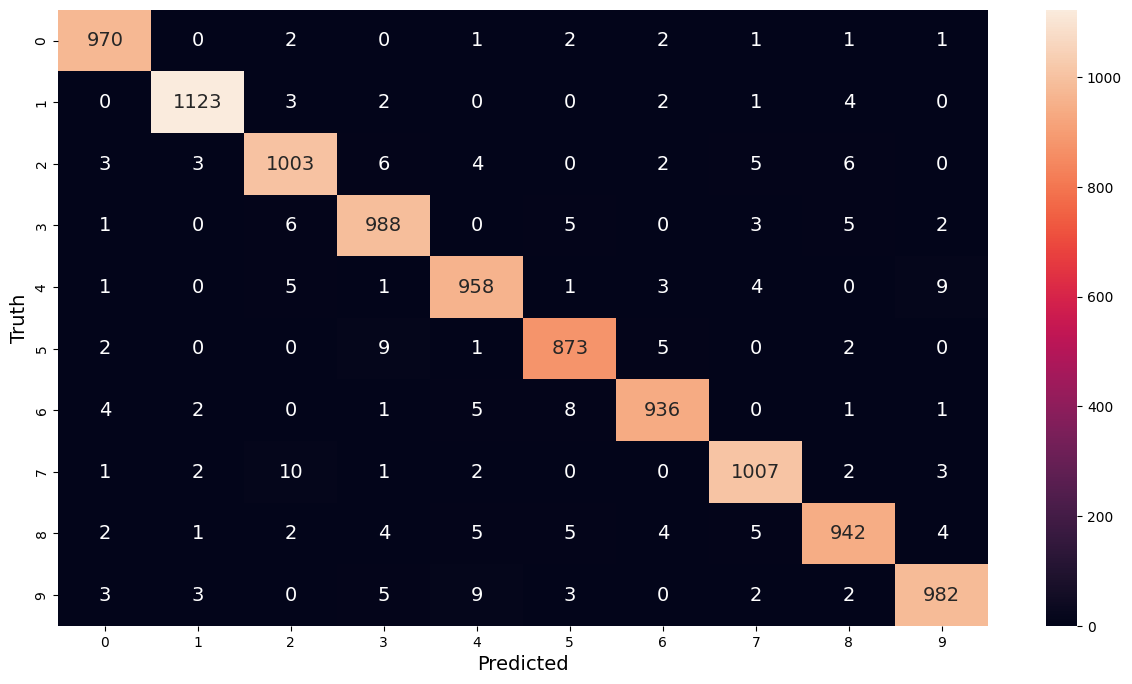

In [46]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[15, 8])
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()